# Final Project Data Analytics and IoT
## GeoLife Trajectories 

In [14]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Setting seed for reproducibility
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
from keras.layers.core import Activation
from keras.utils import pad_sequences
from sklearn.metrics import mean_squared_error as mse
from keras.models import Sequential
from keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Create an empty list to store the DataFrames
df_list = []

# Loop over each of the 181 folders
for i in range(182):
    # Create the folder path for each folder
    folder_path = "./{:03d}/Trajectory".format(i)

    # Get a list of all of the .plt files in the folder
    file_list = [f for f in os.listdir(folder_path) if f.endswith(".plt")]

    # Loop over each .plt file in the folder
    for file in file_list:
        # Create the file path for each .plt file
        file_path = os.path.join(folder_path, file)

        # Load the .plt file into a DataFrame
        df = pd.read_csv(file_path, delimiter=',', header=None, skiprows=7,
                         names=["Latitude", "Longitude", "Reserved_1", "Altitude", "Reserved_2", "Date", "Time"])

        # Convert the Altitude column from feet to meters
        df['Altitude'] = df['Altitude'] * 0.3048

        # Convert the Date and Time columns into a single datetime column
        df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')

        # Drop the original Date and Time columns
        df = df.drop(['Date', 'Time'], axis=1)

        ## Add user column

        df['user'] = "{:03d}".format(i)

        # Append the loaded DataFrame to the list
        df_list.append(df)

# Concatenate all of the DataFrames in the list into a single DataFrame
df = pd.concat(df_list)

df['label'] = ''


In [21]:
# here we will be checking the time and get the exact time between the transportation mode
def is_between(time, row_to_check):
    if row_to_check['start_time'] <= time <= row_to_check['end_time']:
        return row_to_check['transportation_mode']

In [22]:
df_list_w_labels = []
# add labels to df if they exist
for i in range(182):
    # Create the folder path for each folder
    folder_path = "./{:03d}".format(i)
    # Check to see if a .txt file exists in the folder
    for f in os.listdir(folder_path):
        if f.endswith('.txt'):
            file_path = os.path.join(folder_path, f)
            # Load the .plt file into a DataFrame
            df_labels = pd.read_csv(file_path, delimiter='\t', header=None, skiprows=1,
                         names=["start_time", "end_time", "transportation_mode"])
            df_labels['user'] = "{:03d}".format(i)
            df_labels['start_time'] = pd.to_datetime(df_labels['start_time'], format='%Y/%m/%d %H:%M:%S')
            df_labels['end_time'] = pd.to_datetime(df_labels['end_time'], format='%Y/%m/%d %H:%M:%S')
            df_user = df[df['user'] == "{:03d}".format(i)]
            for j, row in df_labels.iterrows():
                print('file: ' + str(i) + ' row ' + str(j) + ' of ' + str(len(df_labels)))
                mask = (df_user['Datetime'] >= row['start_time'])
                df_to_apply = df_user[mask]
                df_user.loc[mask, 'label'] = df_to_apply['Datetime'].apply(lambda x: is_between(x, row))
            df_list_w_labels.append(df_user)
            break
df_labels = pd.concat(df_list_w_labels)

df_labels.to_pickle('df_labels.pkl')

file: 10 row 0 of 434
file: 10 row 1 of 434
file: 10 row 2 of 434
file: 10 row 3 of 434
file: 10 row 4 of 434
file: 10 row 5 of 434
file: 10 row 6 of 434
file: 10 row 7 of 434
file: 10 row 8 of 434
file: 10 row 9 of 434
file: 10 row 10 of 434
file: 10 row 11 of 434
file: 10 row 12 of 434
file: 10 row 13 of 434
file: 10 row 14 of 434
file: 10 row 15 of 434
file: 10 row 16 of 434
file: 10 row 17 of 434
file: 10 row 18 of 434
file: 10 row 19 of 434
file: 10 row 20 of 434
file: 10 row 21 of 434
file: 10 row 22 of 434
file: 10 row 23 of 434
file: 10 row 24 of 434
file: 10 row 25 of 434
file: 10 row 26 of 434
file: 10 row 27 of 434
file: 10 row 28 of 434
file: 10 row 29 of 434
file: 10 row 30 of 434
file: 10 row 31 of 434
file: 10 row 32 of 434
file: 10 row 33 of 434
file: 10 row 34 of 434
file: 10 row 35 of 434
file: 10 row 36 of 434
file: 10 row 37 of 434
file: 10 row 38 of 434
file: 10 row 39 of 434
file: 10 row 40 of 434
file: 10 row 41 of 434
file: 10 row 42 of 434
file: 10 row 43 of 43

file: 10 row 346 of 434
file: 10 row 347 of 434
file: 10 row 348 of 434
file: 10 row 349 of 434
file: 10 row 350 of 434
file: 10 row 351 of 434
file: 10 row 352 of 434
file: 10 row 353 of 434
file: 10 row 354 of 434
file: 10 row 355 of 434
file: 10 row 356 of 434
file: 10 row 357 of 434
file: 10 row 358 of 434
file: 10 row 359 of 434
file: 10 row 360 of 434
file: 10 row 361 of 434
file: 10 row 362 of 434
file: 10 row 363 of 434
file: 10 row 364 of 434
file: 10 row 365 of 434
file: 10 row 366 of 434
file: 10 row 367 of 434
file: 10 row 368 of 434
file: 10 row 369 of 434
file: 10 row 370 of 434
file: 10 row 371 of 434
file: 10 row 372 of 434
file: 10 row 373 of 434
file: 10 row 374 of 434
file: 10 row 375 of 434
file: 10 row 376 of 434
file: 10 row 377 of 434
file: 10 row 378 of 434
file: 10 row 379 of 434
file: 10 row 380 of 434
file: 10 row 381 of 434
file: 10 row 382 of 434
file: 10 row 383 of 434
file: 10 row 384 of 434
file: 10 row 385 of 434
file: 10 row 386 of 434
file: 10 row 387

file: 52 row 21 of 425
file: 52 row 22 of 425
file: 52 row 23 of 425
file: 52 row 24 of 425
file: 52 row 25 of 425
file: 52 row 26 of 425
file: 52 row 27 of 425
file: 52 row 28 of 425
file: 52 row 29 of 425
file: 52 row 30 of 425
file: 52 row 31 of 425
file: 52 row 32 of 425
file: 52 row 33 of 425
file: 52 row 34 of 425
file: 52 row 35 of 425
file: 52 row 36 of 425
file: 52 row 37 of 425
file: 52 row 38 of 425
file: 52 row 39 of 425
file: 52 row 40 of 425
file: 52 row 41 of 425
file: 52 row 42 of 425
file: 52 row 43 of 425
file: 52 row 44 of 425
file: 52 row 45 of 425
file: 52 row 46 of 425
file: 52 row 47 of 425
file: 52 row 48 of 425
file: 52 row 49 of 425
file: 52 row 50 of 425
file: 52 row 51 of 425
file: 52 row 52 of 425
file: 52 row 53 of 425
file: 52 row 54 of 425
file: 52 row 55 of 425
file: 52 row 56 of 425
file: 52 row 57 of 425
file: 52 row 58 of 425
file: 52 row 59 of 425
file: 52 row 60 of 425
file: 52 row 61 of 425
file: 52 row 62 of 425
file: 52 row 63 of 425
file: 52 ro

file: 52 row 366 of 425
file: 52 row 367 of 425
file: 52 row 368 of 425
file: 52 row 369 of 425
file: 52 row 370 of 425
file: 52 row 371 of 425
file: 52 row 372 of 425
file: 52 row 373 of 425
file: 52 row 374 of 425
file: 52 row 375 of 425
file: 52 row 376 of 425
file: 52 row 377 of 425
file: 52 row 378 of 425
file: 52 row 379 of 425
file: 52 row 380 of 425
file: 52 row 381 of 425
file: 52 row 382 of 425
file: 52 row 383 of 425
file: 52 row 384 of 425
file: 52 row 385 of 425
file: 52 row 386 of 425
file: 52 row 387 of 425
file: 52 row 388 of 425
file: 52 row 389 of 425
file: 52 row 390 of 425
file: 52 row 391 of 425
file: 52 row 392 of 425
file: 52 row 393 of 425
file: 52 row 394 of 425
file: 52 row 395 of 425
file: 52 row 396 of 425
file: 52 row 397 of 425
file: 52 row 398 of 425
file: 52 row 399 of 425
file: 52 row 400 of 425
file: 52 row 401 of 425
file: 52 row 402 of 425
file: 52 row 403 of 425
file: 52 row 404 of 425
file: 52 row 405 of 425
file: 52 row 406 of 425
file: 52 row 407

file: 62 row 207 of 782
file: 62 row 208 of 782
file: 62 row 209 of 782
file: 62 row 210 of 782
file: 62 row 211 of 782
file: 62 row 212 of 782
file: 62 row 213 of 782
file: 62 row 214 of 782
file: 62 row 215 of 782
file: 62 row 216 of 782
file: 62 row 217 of 782
file: 62 row 218 of 782
file: 62 row 219 of 782
file: 62 row 220 of 782
file: 62 row 221 of 782
file: 62 row 222 of 782
file: 62 row 223 of 782
file: 62 row 224 of 782
file: 62 row 225 of 782
file: 62 row 226 of 782
file: 62 row 227 of 782
file: 62 row 228 of 782
file: 62 row 229 of 782
file: 62 row 230 of 782
file: 62 row 231 of 782
file: 62 row 232 of 782
file: 62 row 233 of 782
file: 62 row 234 of 782
file: 62 row 235 of 782
file: 62 row 236 of 782
file: 62 row 237 of 782
file: 62 row 238 of 782
file: 62 row 239 of 782
file: 62 row 240 of 782
file: 62 row 241 of 782
file: 62 row 242 of 782
file: 62 row 243 of 782
file: 62 row 244 of 782
file: 62 row 245 of 782
file: 62 row 246 of 782
file: 62 row 247 of 782
file: 62 row 248

file: 62 row 549 of 782
file: 62 row 550 of 782
file: 62 row 551 of 782
file: 62 row 552 of 782
file: 62 row 553 of 782
file: 62 row 554 of 782
file: 62 row 555 of 782
file: 62 row 556 of 782
file: 62 row 557 of 782
file: 62 row 558 of 782
file: 62 row 559 of 782
file: 62 row 560 of 782
file: 62 row 561 of 782
file: 62 row 562 of 782
file: 62 row 563 of 782
file: 62 row 564 of 782
file: 62 row 565 of 782
file: 62 row 566 of 782
file: 62 row 567 of 782
file: 62 row 568 of 782
file: 62 row 569 of 782
file: 62 row 570 of 782
file: 62 row 571 of 782
file: 62 row 572 of 782
file: 62 row 573 of 782
file: 62 row 574 of 782
file: 62 row 575 of 782
file: 62 row 576 of 782
file: 62 row 577 of 782
file: 62 row 578 of 782
file: 62 row 579 of 782
file: 62 row 580 of 782
file: 62 row 581 of 782
file: 62 row 582 of 782
file: 62 row 583 of 782
file: 62 row 584 of 782
file: 62 row 585 of 782
file: 62 row 586 of 782
file: 62 row 587 of 782
file: 62 row 588 of 782
file: 62 row 589 of 782
file: 62 row 590

file: 65 row 49 of 206
file: 65 row 50 of 206
file: 65 row 51 of 206
file: 65 row 52 of 206
file: 65 row 53 of 206
file: 65 row 54 of 206
file: 65 row 55 of 206
file: 65 row 56 of 206
file: 65 row 57 of 206
file: 65 row 58 of 206
file: 65 row 59 of 206
file: 65 row 60 of 206
file: 65 row 61 of 206
file: 65 row 62 of 206
file: 65 row 63 of 206
file: 65 row 64 of 206
file: 65 row 65 of 206
file: 65 row 66 of 206
file: 65 row 67 of 206
file: 65 row 68 of 206
file: 65 row 69 of 206
file: 65 row 70 of 206
file: 65 row 71 of 206
file: 65 row 72 of 206
file: 65 row 73 of 206
file: 65 row 74 of 206
file: 65 row 75 of 206
file: 65 row 76 of 206
file: 65 row 77 of 206
file: 65 row 78 of 206
file: 65 row 79 of 206
file: 65 row 80 of 206
file: 65 row 81 of 206
file: 65 row 82 of 206
file: 65 row 83 of 206
file: 65 row 84 of 206
file: 65 row 85 of 206
file: 65 row 86 of 206
file: 65 row 87 of 206
file: 65 row 88 of 206
file: 65 row 89 of 206
file: 65 row 90 of 206
file: 65 row 91 of 206
file: 65 ro

file: 68 row 79 of 969
file: 68 row 80 of 969
file: 68 row 81 of 969
file: 68 row 82 of 969
file: 68 row 83 of 969
file: 68 row 84 of 969
file: 68 row 85 of 969
file: 68 row 86 of 969
file: 68 row 87 of 969
file: 68 row 88 of 969
file: 68 row 89 of 969
file: 68 row 90 of 969
file: 68 row 91 of 969
file: 68 row 92 of 969
file: 68 row 93 of 969
file: 68 row 94 of 969
file: 68 row 95 of 969
file: 68 row 96 of 969
file: 68 row 97 of 969
file: 68 row 98 of 969
file: 68 row 99 of 969
file: 68 row 100 of 969
file: 68 row 101 of 969
file: 68 row 102 of 969
file: 68 row 103 of 969
file: 68 row 104 of 969
file: 68 row 105 of 969
file: 68 row 106 of 969
file: 68 row 107 of 969
file: 68 row 108 of 969
file: 68 row 109 of 969
file: 68 row 110 of 969
file: 68 row 111 of 969
file: 68 row 112 of 969
file: 68 row 113 of 969
file: 68 row 114 of 969
file: 68 row 115 of 969
file: 68 row 116 of 969
file: 68 row 117 of 969
file: 68 row 118 of 969
file: 68 row 119 of 969
file: 68 row 120 of 969
file: 68 row 

file: 68 row 422 of 969
file: 68 row 423 of 969
file: 68 row 424 of 969
file: 68 row 425 of 969
file: 68 row 426 of 969
file: 68 row 427 of 969
file: 68 row 428 of 969
file: 68 row 429 of 969
file: 68 row 430 of 969
file: 68 row 431 of 969
file: 68 row 432 of 969
file: 68 row 433 of 969
file: 68 row 434 of 969
file: 68 row 435 of 969
file: 68 row 436 of 969
file: 68 row 437 of 969
file: 68 row 438 of 969
file: 68 row 439 of 969
file: 68 row 440 of 969
file: 68 row 441 of 969
file: 68 row 442 of 969
file: 68 row 443 of 969
file: 68 row 444 of 969
file: 68 row 445 of 969
file: 68 row 446 of 969
file: 68 row 447 of 969
file: 68 row 448 of 969
file: 68 row 449 of 969
file: 68 row 450 of 969
file: 68 row 451 of 969
file: 68 row 452 of 969
file: 68 row 453 of 969
file: 68 row 454 of 969
file: 68 row 455 of 969
file: 68 row 456 of 969
file: 68 row 457 of 969
file: 68 row 458 of 969
file: 68 row 459 of 969
file: 68 row 460 of 969
file: 68 row 461 of 969
file: 68 row 462 of 969
file: 68 row 463

file: 68 row 764 of 969
file: 68 row 765 of 969
file: 68 row 766 of 969
file: 68 row 767 of 969
file: 68 row 768 of 969
file: 68 row 769 of 969
file: 68 row 770 of 969
file: 68 row 771 of 969
file: 68 row 772 of 969
file: 68 row 773 of 969
file: 68 row 774 of 969
file: 68 row 775 of 969
file: 68 row 776 of 969
file: 68 row 777 of 969
file: 68 row 778 of 969
file: 68 row 779 of 969
file: 68 row 780 of 969
file: 68 row 781 of 969
file: 68 row 782 of 969
file: 68 row 783 of 969
file: 68 row 784 of 969
file: 68 row 785 of 969
file: 68 row 786 of 969
file: 68 row 787 of 969
file: 68 row 788 of 969
file: 68 row 789 of 969
file: 68 row 790 of 969
file: 68 row 791 of 969
file: 68 row 792 of 969
file: 68 row 793 of 969
file: 68 row 794 of 969
file: 68 row 795 of 969
file: 68 row 796 of 969
file: 68 row 797 of 969
file: 68 row 798 of 969
file: 68 row 799 of 969
file: 68 row 800 of 969
file: 68 row 801 of 969
file: 68 row 802 of 969
file: 68 row 803 of 969
file: 68 row 804 of 969
file: 68 row 805

file: 75 row 72 of 509
file: 75 row 73 of 509
file: 75 row 74 of 509
file: 75 row 75 of 509
file: 75 row 76 of 509
file: 75 row 77 of 509
file: 75 row 78 of 509
file: 75 row 79 of 509
file: 75 row 80 of 509
file: 75 row 81 of 509
file: 75 row 82 of 509
file: 75 row 83 of 509
file: 75 row 84 of 509
file: 75 row 85 of 509
file: 75 row 86 of 509
file: 75 row 87 of 509
file: 75 row 88 of 509
file: 75 row 89 of 509
file: 75 row 90 of 509
file: 75 row 91 of 509
file: 75 row 92 of 509
file: 75 row 93 of 509
file: 75 row 94 of 509
file: 75 row 95 of 509
file: 75 row 96 of 509
file: 75 row 97 of 509
file: 75 row 98 of 509
file: 75 row 99 of 509
file: 75 row 100 of 509
file: 75 row 101 of 509
file: 75 row 102 of 509
file: 75 row 103 of 509
file: 75 row 104 of 509
file: 75 row 105 of 509
file: 75 row 106 of 509
file: 75 row 107 of 509
file: 75 row 108 of 509
file: 75 row 109 of 509
file: 75 row 110 of 509
file: 75 row 111 of 509
file: 75 row 112 of 509
file: 75 row 113 of 509
file: 75 row 114 of 

file: 75 row 415 of 509
file: 75 row 416 of 509
file: 75 row 417 of 509
file: 75 row 418 of 509
file: 75 row 419 of 509
file: 75 row 420 of 509
file: 75 row 421 of 509
file: 75 row 422 of 509
file: 75 row 423 of 509
file: 75 row 424 of 509
file: 75 row 425 of 509
file: 75 row 426 of 509
file: 75 row 427 of 509
file: 75 row 428 of 509
file: 75 row 429 of 509
file: 75 row 430 of 509
file: 75 row 431 of 509
file: 75 row 432 of 509
file: 75 row 433 of 509
file: 75 row 434 of 509
file: 75 row 435 of 509
file: 75 row 436 of 509
file: 75 row 437 of 509
file: 75 row 438 of 509
file: 75 row 439 of 509
file: 75 row 440 of 509
file: 75 row 441 of 509
file: 75 row 442 of 509
file: 75 row 443 of 509
file: 75 row 444 of 509
file: 75 row 445 of 509
file: 75 row 446 of 509
file: 75 row 447 of 509
file: 75 row 448 of 509
file: 75 row 449 of 509
file: 75 row 450 of 509
file: 75 row 451 of 509
file: 75 row 452 of 509
file: 75 row 453 of 509
file: 75 row 454 of 509
file: 75 row 455 of 509
file: 75 row 456

file: 82 row 75 of 119
file: 82 row 76 of 119
file: 82 row 77 of 119
file: 82 row 78 of 119
file: 82 row 79 of 119
file: 82 row 80 of 119
file: 82 row 81 of 119
file: 82 row 82 of 119
file: 82 row 83 of 119
file: 82 row 84 of 119
file: 82 row 85 of 119
file: 82 row 86 of 119
file: 82 row 87 of 119
file: 82 row 88 of 119
file: 82 row 89 of 119
file: 82 row 90 of 119
file: 82 row 91 of 119
file: 82 row 92 of 119
file: 82 row 93 of 119
file: 82 row 94 of 119
file: 82 row 95 of 119
file: 82 row 96 of 119
file: 82 row 97 of 119
file: 82 row 98 of 119
file: 82 row 99 of 119
file: 82 row 100 of 119
file: 82 row 101 of 119
file: 82 row 102 of 119
file: 82 row 103 of 119
file: 82 row 104 of 119
file: 82 row 105 of 119
file: 82 row 106 of 119
file: 82 row 107 of 119
file: 82 row 108 of 119
file: 82 row 109 of 119
file: 82 row 110 of 119
file: 82 row 111 of 119
file: 82 row 112 of 119
file: 82 row 113 of 119
file: 82 row 114 of 119
file: 82 row 115 of 119
file: 82 row 116 of 119
file: 82 row 117 

file: 84 row 303 of 422
file: 84 row 304 of 422
file: 84 row 305 of 422
file: 84 row 306 of 422
file: 84 row 307 of 422
file: 84 row 308 of 422
file: 84 row 309 of 422
file: 84 row 310 of 422
file: 84 row 311 of 422
file: 84 row 312 of 422
file: 84 row 313 of 422
file: 84 row 314 of 422
file: 84 row 315 of 422
file: 84 row 316 of 422
file: 84 row 317 of 422
file: 84 row 318 of 422
file: 84 row 319 of 422
file: 84 row 320 of 422
file: 84 row 321 of 422
file: 84 row 322 of 422
file: 84 row 323 of 422
file: 84 row 324 of 422
file: 84 row 325 of 422
file: 84 row 326 of 422
file: 84 row 327 of 422
file: 84 row 328 of 422
file: 84 row 329 of 422
file: 84 row 330 of 422
file: 84 row 331 of 422
file: 84 row 332 of 422
file: 84 row 333 of 422
file: 84 row 334 of 422
file: 84 row 335 of 422
file: 84 row 336 of 422
file: 84 row 337 of 422
file: 84 row 338 of 422
file: 84 row 339 of 422
file: 84 row 340 of 422
file: 84 row 341 of 422
file: 84 row 342 of 422
file: 84 row 343 of 422
file: 84 row 344

file: 85 row 218 of 1298
file: 85 row 219 of 1298
file: 85 row 220 of 1298
file: 85 row 221 of 1298
file: 85 row 222 of 1298
file: 85 row 223 of 1298
file: 85 row 224 of 1298
file: 85 row 225 of 1298
file: 85 row 226 of 1298
file: 85 row 227 of 1298
file: 85 row 228 of 1298
file: 85 row 229 of 1298
file: 85 row 230 of 1298
file: 85 row 231 of 1298
file: 85 row 232 of 1298
file: 85 row 233 of 1298
file: 85 row 234 of 1298
file: 85 row 235 of 1298
file: 85 row 236 of 1298
file: 85 row 237 of 1298
file: 85 row 238 of 1298
file: 85 row 239 of 1298
file: 85 row 240 of 1298
file: 85 row 241 of 1298
file: 85 row 242 of 1298
file: 85 row 243 of 1298
file: 85 row 244 of 1298
file: 85 row 245 of 1298
file: 85 row 246 of 1298
file: 85 row 247 of 1298
file: 85 row 248 of 1298
file: 85 row 249 of 1298
file: 85 row 250 of 1298
file: 85 row 251 of 1298
file: 85 row 252 of 1298
file: 85 row 253 of 1298
file: 85 row 254 of 1298
file: 85 row 255 of 1298
file: 85 row 256 of 1298
file: 85 row 257 of 1298


file: 85 row 546 of 1298
file: 85 row 547 of 1298
file: 85 row 548 of 1298
file: 85 row 549 of 1298
file: 85 row 550 of 1298
file: 85 row 551 of 1298
file: 85 row 552 of 1298
file: 85 row 553 of 1298
file: 85 row 554 of 1298
file: 85 row 555 of 1298
file: 85 row 556 of 1298
file: 85 row 557 of 1298
file: 85 row 558 of 1298
file: 85 row 559 of 1298
file: 85 row 560 of 1298
file: 85 row 561 of 1298
file: 85 row 562 of 1298
file: 85 row 563 of 1298
file: 85 row 564 of 1298
file: 85 row 565 of 1298
file: 85 row 566 of 1298
file: 85 row 567 of 1298
file: 85 row 568 of 1298
file: 85 row 569 of 1298
file: 85 row 570 of 1298
file: 85 row 571 of 1298
file: 85 row 572 of 1298
file: 85 row 573 of 1298
file: 85 row 574 of 1298
file: 85 row 575 of 1298
file: 85 row 576 of 1298
file: 85 row 577 of 1298
file: 85 row 578 of 1298
file: 85 row 579 of 1298
file: 85 row 580 of 1298
file: 85 row 581 of 1298
file: 85 row 582 of 1298
file: 85 row 583 of 1298
file: 85 row 584 of 1298
file: 85 row 585 of 1298


file: 85 row 874 of 1298
file: 85 row 875 of 1298
file: 85 row 876 of 1298
file: 85 row 877 of 1298
file: 85 row 878 of 1298
file: 85 row 879 of 1298
file: 85 row 880 of 1298
file: 85 row 881 of 1298
file: 85 row 882 of 1298
file: 85 row 883 of 1298
file: 85 row 884 of 1298
file: 85 row 885 of 1298
file: 85 row 886 of 1298
file: 85 row 887 of 1298
file: 85 row 888 of 1298
file: 85 row 889 of 1298
file: 85 row 890 of 1298
file: 85 row 891 of 1298
file: 85 row 892 of 1298
file: 85 row 893 of 1298
file: 85 row 894 of 1298
file: 85 row 895 of 1298
file: 85 row 896 of 1298
file: 85 row 897 of 1298
file: 85 row 898 of 1298
file: 85 row 899 of 1298
file: 85 row 900 of 1298
file: 85 row 901 of 1298
file: 85 row 902 of 1298
file: 85 row 903 of 1298
file: 85 row 904 of 1298
file: 85 row 905 of 1298
file: 85 row 906 of 1298
file: 85 row 907 of 1298
file: 85 row 908 of 1298
file: 85 row 909 of 1298
file: 85 row 910 of 1298
file: 85 row 911 of 1298
file: 85 row 912 of 1298
file: 85 row 913 of 1298


file: 85 row 1195 of 1298
file: 85 row 1196 of 1298
file: 85 row 1197 of 1298
file: 85 row 1198 of 1298
file: 85 row 1199 of 1298
file: 85 row 1200 of 1298
file: 85 row 1201 of 1298
file: 85 row 1202 of 1298
file: 85 row 1203 of 1298
file: 85 row 1204 of 1298
file: 85 row 1205 of 1298
file: 85 row 1206 of 1298
file: 85 row 1207 of 1298
file: 85 row 1208 of 1298
file: 85 row 1209 of 1298
file: 85 row 1210 of 1298
file: 85 row 1211 of 1298
file: 85 row 1212 of 1298
file: 85 row 1213 of 1298
file: 85 row 1214 of 1298
file: 85 row 1215 of 1298
file: 85 row 1216 of 1298
file: 85 row 1217 of 1298
file: 85 row 1218 of 1298
file: 85 row 1219 of 1298
file: 85 row 1220 of 1298
file: 85 row 1221 of 1298
file: 85 row 1222 of 1298
file: 85 row 1223 of 1298
file: 85 row 1224 of 1298
file: 85 row 1225 of 1298
file: 85 row 1226 of 1298
file: 85 row 1227 of 1298
file: 85 row 1228 of 1298
file: 85 row 1229 of 1298
file: 85 row 1230 of 1298
file: 85 row 1231 of 1298
file: 85 row 1232 of 1298
file: 85 row

file: 92 row 25 of 43
file: 92 row 26 of 43
file: 92 row 27 of 43
file: 92 row 28 of 43
file: 92 row 29 of 43
file: 92 row 30 of 43
file: 92 row 31 of 43
file: 92 row 32 of 43
file: 92 row 33 of 43
file: 92 row 34 of 43
file: 92 row 35 of 43
file: 92 row 36 of 43
file: 92 row 37 of 43
file: 92 row 38 of 43
file: 92 row 39 of 43
file: 92 row 40 of 43
file: 92 row 41 of 43
file: 92 row 42 of 43
file: 96 row 0 of 119
file: 96 row 1 of 119
file: 96 row 2 of 119
file: 96 row 3 of 119
file: 96 row 4 of 119
file: 96 row 5 of 119
file: 96 row 6 of 119
file: 96 row 7 of 119
file: 96 row 8 of 119
file: 96 row 9 of 119
file: 96 row 10 of 119
file: 96 row 11 of 119
file: 96 row 12 of 119
file: 96 row 13 of 119
file: 96 row 14 of 119
file: 96 row 15 of 119
file: 96 row 16 of 119
file: 96 row 17 of 119
file: 96 row 18 of 119
file: 96 row 19 of 119
file: 96 row 20 of 119
file: 96 row 21 of 119
file: 96 row 22 of 119
file: 96 row 23 of 119
file: 96 row 24 of 119
file: 96 row 25 of 119
file: 96 row 26 

file: 105 row 0 of 32
file: 105 row 1 of 32
file: 105 row 2 of 32
file: 105 row 3 of 32
file: 105 row 4 of 32
file: 105 row 5 of 32
file: 105 row 6 of 32
file: 105 row 7 of 32
file: 105 row 8 of 32
file: 105 row 9 of 32
file: 105 row 10 of 32
file: 105 row 11 of 32
file: 105 row 12 of 32
file: 105 row 13 of 32
file: 105 row 14 of 32
file: 105 row 15 of 32
file: 105 row 16 of 32
file: 105 row 17 of 32
file: 105 row 18 of 32
file: 105 row 19 of 32
file: 105 row 20 of 32
file: 105 row 21 of 32
file: 105 row 22 of 32
file: 105 row 23 of 32
file: 105 row 24 of 32
file: 105 row 25 of 32
file: 105 row 26 of 32
file: 105 row 27 of 32
file: 105 row 28 of 32
file: 105 row 29 of 32
file: 105 row 30 of 32
file: 105 row 31 of 32
file: 106 row 0 of 3
file: 106 row 1 of 3
file: 106 row 2 of 3
file: 107 row 0 of 5
file: 107 row 1 of 5
file: 107 row 2 of 5
file: 107 row 3 of 5
file: 107 row 4 of 5
file: 108 row 0 of 10
file: 108 row 1 of 10
file: 108 row 2 of 10
file: 108 row 3 of 10
file: 108 row 4 of

file: 115 row 12 of 139
file: 115 row 13 of 139
file: 115 row 14 of 139
file: 115 row 15 of 139
file: 115 row 16 of 139
file: 115 row 17 of 139
file: 115 row 18 of 139
file: 115 row 19 of 139
file: 115 row 20 of 139
file: 115 row 21 of 139
file: 115 row 22 of 139
file: 115 row 23 of 139
file: 115 row 24 of 139
file: 115 row 25 of 139
file: 115 row 26 of 139
file: 115 row 27 of 139
file: 115 row 28 of 139
file: 115 row 29 of 139
file: 115 row 30 of 139
file: 115 row 31 of 139
file: 115 row 32 of 139
file: 115 row 33 of 139
file: 115 row 34 of 139
file: 115 row 35 of 139
file: 115 row 36 of 139
file: 115 row 37 of 139
file: 115 row 38 of 139
file: 115 row 39 of 139
file: 115 row 40 of 139
file: 115 row 41 of 139
file: 115 row 42 of 139
file: 115 row 43 of 139
file: 115 row 44 of 139
file: 115 row 45 of 139
file: 115 row 46 of 139
file: 115 row 47 of 139
file: 115 row 48 of 139
file: 115 row 49 of 139
file: 115 row 50 of 139
file: 115 row 51 of 139
file: 115 row 52 of 139
file: 115 row 53

file: 126 row 37 of 468
file: 126 row 38 of 468
file: 126 row 39 of 468
file: 126 row 40 of 468
file: 126 row 41 of 468
file: 126 row 42 of 468
file: 126 row 43 of 468
file: 126 row 44 of 468
file: 126 row 45 of 468
file: 126 row 46 of 468
file: 126 row 47 of 468
file: 126 row 48 of 468
file: 126 row 49 of 468
file: 126 row 50 of 468
file: 126 row 51 of 468
file: 126 row 52 of 468
file: 126 row 53 of 468
file: 126 row 54 of 468
file: 126 row 55 of 468
file: 126 row 56 of 468
file: 126 row 57 of 468
file: 126 row 58 of 468
file: 126 row 59 of 468
file: 126 row 60 of 468
file: 126 row 61 of 468
file: 126 row 62 of 468
file: 126 row 63 of 468
file: 126 row 64 of 468
file: 126 row 65 of 468
file: 126 row 66 of 468
file: 126 row 67 of 468
file: 126 row 68 of 468
file: 126 row 69 of 468
file: 126 row 70 of 468
file: 126 row 71 of 468
file: 126 row 72 of 468
file: 126 row 73 of 468
file: 126 row 74 of 468
file: 126 row 75 of 468
file: 126 row 76 of 468
file: 126 row 77 of 468
file: 126 row 78

file: 126 row 368 of 468
file: 126 row 369 of 468
file: 126 row 370 of 468
file: 126 row 371 of 468
file: 126 row 372 of 468
file: 126 row 373 of 468
file: 126 row 374 of 468
file: 126 row 375 of 468
file: 126 row 376 of 468
file: 126 row 377 of 468
file: 126 row 378 of 468
file: 126 row 379 of 468
file: 126 row 380 of 468
file: 126 row 381 of 468
file: 126 row 382 of 468
file: 126 row 383 of 468
file: 126 row 384 of 468
file: 126 row 385 of 468
file: 126 row 386 of 468
file: 126 row 387 of 468
file: 126 row 388 of 468
file: 126 row 389 of 468
file: 126 row 390 of 468
file: 126 row 391 of 468
file: 126 row 392 of 468
file: 126 row 393 of 468
file: 126 row 394 of 468
file: 126 row 395 of 468
file: 126 row 396 of 468
file: 126 row 397 of 468
file: 126 row 398 of 468
file: 126 row 399 of 468
file: 126 row 400 of 468
file: 126 row 401 of 468
file: 126 row 402 of 468
file: 126 row 403 of 468
file: 126 row 404 of 468
file: 126 row 405 of 468
file: 126 row 406 of 468
file: 126 row 407 of 468


file: 128 row 233 of 937
file: 128 row 234 of 937
file: 128 row 235 of 937
file: 128 row 236 of 937
file: 128 row 237 of 937
file: 128 row 238 of 937
file: 128 row 239 of 937
file: 128 row 240 of 937
file: 128 row 241 of 937
file: 128 row 242 of 937
file: 128 row 243 of 937
file: 128 row 244 of 937
file: 128 row 245 of 937
file: 128 row 246 of 937
file: 128 row 247 of 937
file: 128 row 248 of 937
file: 128 row 249 of 937
file: 128 row 250 of 937
file: 128 row 251 of 937
file: 128 row 252 of 937
file: 128 row 253 of 937
file: 128 row 254 of 937
file: 128 row 255 of 937
file: 128 row 256 of 937
file: 128 row 257 of 937
file: 128 row 258 of 937
file: 128 row 259 of 937
file: 128 row 260 of 937
file: 128 row 261 of 937
file: 128 row 262 of 937
file: 128 row 263 of 937
file: 128 row 264 of 937
file: 128 row 265 of 937
file: 128 row 266 of 937
file: 128 row 267 of 937
file: 128 row 268 of 937
file: 128 row 269 of 937
file: 128 row 270 of 937
file: 128 row 271 of 937
file: 128 row 272 of 937


file: 128 row 561 of 937
file: 128 row 562 of 937
file: 128 row 563 of 937
file: 128 row 564 of 937
file: 128 row 565 of 937
file: 128 row 566 of 937
file: 128 row 567 of 937
file: 128 row 568 of 937
file: 128 row 569 of 937
file: 128 row 570 of 937
file: 128 row 571 of 937
file: 128 row 572 of 937
file: 128 row 573 of 937
file: 128 row 574 of 937
file: 128 row 575 of 937
file: 128 row 576 of 937
file: 128 row 577 of 937
file: 128 row 578 of 937
file: 128 row 579 of 937
file: 128 row 580 of 937
file: 128 row 581 of 937
file: 128 row 582 of 937
file: 128 row 583 of 937
file: 128 row 584 of 937
file: 128 row 585 of 937
file: 128 row 586 of 937
file: 128 row 587 of 937
file: 128 row 588 of 937
file: 128 row 589 of 937
file: 128 row 590 of 937
file: 128 row 591 of 937
file: 128 row 592 of 937
file: 128 row 593 of 937
file: 128 row 594 of 937
file: 128 row 595 of 937
file: 128 row 596 of 937
file: 128 row 597 of 937
file: 128 row 598 of 937
file: 128 row 599 of 937
file: 128 row 600 of 937


file: 128 row 889 of 937
file: 128 row 890 of 937
file: 128 row 891 of 937
file: 128 row 892 of 937
file: 128 row 893 of 937
file: 128 row 894 of 937
file: 128 row 895 of 937
file: 128 row 896 of 937
file: 128 row 897 of 937
file: 128 row 898 of 937
file: 128 row 899 of 937
file: 128 row 900 of 937
file: 128 row 901 of 937
file: 128 row 902 of 937
file: 128 row 903 of 937
file: 128 row 904 of 937
file: 128 row 905 of 937
file: 128 row 906 of 937
file: 128 row 907 of 937
file: 128 row 908 of 937
file: 128 row 909 of 937
file: 128 row 910 of 937
file: 128 row 911 of 937
file: 128 row 912 of 937
file: 128 row 913 of 937
file: 128 row 914 of 937
file: 128 row 915 of 937
file: 128 row 916 of 937
file: 128 row 917 of 937
file: 128 row 918 of 937
file: 128 row 919 of 937
file: 128 row 920 of 937
file: 128 row 921 of 937
file: 128 row 922 of 937
file: 128 row 923 of 937
file: 128 row 924 of 937
file: 128 row 925 of 937
file: 128 row 926 of 937
file: 128 row 927 of 937
file: 128 row 928 of 937


file: 147 row 90 of 207
file: 147 row 91 of 207
file: 147 row 92 of 207
file: 147 row 93 of 207
file: 147 row 94 of 207
file: 147 row 95 of 207
file: 147 row 96 of 207
file: 147 row 97 of 207
file: 147 row 98 of 207
file: 147 row 99 of 207
file: 147 row 100 of 207
file: 147 row 101 of 207
file: 147 row 102 of 207
file: 147 row 103 of 207
file: 147 row 104 of 207
file: 147 row 105 of 207
file: 147 row 106 of 207
file: 147 row 107 of 207
file: 147 row 108 of 207
file: 147 row 109 of 207
file: 147 row 110 of 207
file: 147 row 111 of 207
file: 147 row 112 of 207
file: 147 row 113 of 207
file: 147 row 114 of 207
file: 147 row 115 of 207
file: 147 row 116 of 207
file: 147 row 117 of 207
file: 147 row 118 of 207
file: 147 row 119 of 207
file: 147 row 120 of 207
file: 147 row 121 of 207
file: 147 row 122 of 207
file: 147 row 123 of 207
file: 147 row 124 of 207
file: 147 row 125 of 207
file: 147 row 126 of 207
file: 147 row 127 of 207
file: 147 row 128 of 207
file: 147 row 129 of 207
file: 147 

file: 153 row 208 of 1123
file: 153 row 209 of 1123
file: 153 row 210 of 1123
file: 153 row 211 of 1123
file: 153 row 212 of 1123
file: 153 row 213 of 1123
file: 153 row 214 of 1123
file: 153 row 215 of 1123
file: 153 row 216 of 1123
file: 153 row 217 of 1123
file: 153 row 218 of 1123
file: 153 row 219 of 1123
file: 153 row 220 of 1123
file: 153 row 221 of 1123
file: 153 row 222 of 1123
file: 153 row 223 of 1123
file: 153 row 224 of 1123
file: 153 row 225 of 1123
file: 153 row 226 of 1123
file: 153 row 227 of 1123
file: 153 row 228 of 1123
file: 153 row 229 of 1123
file: 153 row 230 of 1123
file: 153 row 231 of 1123
file: 153 row 232 of 1123
file: 153 row 233 of 1123
file: 153 row 234 of 1123
file: 153 row 235 of 1123
file: 153 row 236 of 1123
file: 153 row 237 of 1123
file: 153 row 238 of 1123
file: 153 row 239 of 1123
file: 153 row 240 of 1123
file: 153 row 241 of 1123
file: 153 row 242 of 1123
file: 153 row 243 of 1123
file: 153 row 244 of 1123
file: 153 row 245 of 1123
file: 153 ro

file: 153 row 524 of 1123
file: 153 row 525 of 1123
file: 153 row 526 of 1123
file: 153 row 527 of 1123
file: 153 row 528 of 1123
file: 153 row 529 of 1123
file: 153 row 530 of 1123
file: 153 row 531 of 1123
file: 153 row 532 of 1123
file: 153 row 533 of 1123
file: 153 row 534 of 1123
file: 153 row 535 of 1123
file: 153 row 536 of 1123
file: 153 row 537 of 1123
file: 153 row 538 of 1123
file: 153 row 539 of 1123
file: 153 row 540 of 1123
file: 153 row 541 of 1123
file: 153 row 542 of 1123
file: 153 row 543 of 1123
file: 153 row 544 of 1123
file: 153 row 545 of 1123
file: 153 row 546 of 1123
file: 153 row 547 of 1123
file: 153 row 548 of 1123
file: 153 row 549 of 1123
file: 153 row 550 of 1123
file: 153 row 551 of 1123
file: 153 row 552 of 1123
file: 153 row 553 of 1123
file: 153 row 554 of 1123
file: 153 row 555 of 1123
file: 153 row 556 of 1123
file: 153 row 557 of 1123
file: 153 row 558 of 1123
file: 153 row 559 of 1123
file: 153 row 560 of 1123
file: 153 row 561 of 1123
file: 153 ro

file: 153 row 840 of 1123
file: 153 row 841 of 1123
file: 153 row 842 of 1123
file: 153 row 843 of 1123
file: 153 row 844 of 1123
file: 153 row 845 of 1123
file: 153 row 846 of 1123
file: 153 row 847 of 1123
file: 153 row 848 of 1123
file: 153 row 849 of 1123
file: 153 row 850 of 1123
file: 153 row 851 of 1123
file: 153 row 852 of 1123
file: 153 row 853 of 1123
file: 153 row 854 of 1123
file: 153 row 855 of 1123
file: 153 row 856 of 1123
file: 153 row 857 of 1123
file: 153 row 858 of 1123
file: 153 row 859 of 1123
file: 153 row 860 of 1123
file: 153 row 861 of 1123
file: 153 row 862 of 1123
file: 153 row 863 of 1123
file: 153 row 864 of 1123
file: 153 row 865 of 1123
file: 153 row 866 of 1123
file: 153 row 867 of 1123
file: 153 row 868 of 1123
file: 153 row 869 of 1123
file: 153 row 870 of 1123
file: 153 row 871 of 1123
file: 153 row 872 of 1123
file: 153 row 873 of 1123
file: 153 row 874 of 1123
file: 153 row 875 of 1123
file: 153 row 876 of 1123
file: 153 row 877 of 1123
file: 153 ro

file: 154 row 32 of 54
file: 154 row 33 of 54
file: 154 row 34 of 54
file: 154 row 35 of 54
file: 154 row 36 of 54
file: 154 row 37 of 54
file: 154 row 38 of 54
file: 154 row 39 of 54
file: 154 row 40 of 54
file: 154 row 41 of 54
file: 154 row 42 of 54
file: 154 row 43 of 54
file: 154 row 44 of 54
file: 154 row 45 of 54
file: 154 row 46 of 54
file: 154 row 47 of 54
file: 154 row 48 of 54
file: 154 row 49 of 54
file: 154 row 50 of 54
file: 154 row 51 of 54
file: 154 row 52 of 54
file: 154 row 53 of 54
file: 161 row 0 of 38
file: 161 row 1 of 38
file: 161 row 2 of 38
file: 161 row 3 of 38
file: 161 row 4 of 38
file: 161 row 5 of 38
file: 161 row 6 of 38
file: 161 row 7 of 38
file: 161 row 8 of 38
file: 161 row 9 of 38
file: 161 row 10 of 38
file: 161 row 11 of 38
file: 161 row 12 of 38
file: 161 row 13 of 38
file: 161 row 14 of 38
file: 161 row 15 of 38
file: 161 row 16 of 38
file: 161 row 17 of 38
file: 161 row 18 of 38
file: 161 row 19 of 38
file: 161 row 20 of 38
file: 161 row 21 of 3

file: 163 row 267 of 3182
file: 163 row 268 of 3182
file: 163 row 269 of 3182
file: 163 row 270 of 3182
file: 163 row 271 of 3182
file: 163 row 272 of 3182
file: 163 row 273 of 3182
file: 163 row 274 of 3182
file: 163 row 275 of 3182
file: 163 row 276 of 3182
file: 163 row 277 of 3182
file: 163 row 278 of 3182
file: 163 row 279 of 3182
file: 163 row 280 of 3182
file: 163 row 281 of 3182
file: 163 row 282 of 3182
file: 163 row 283 of 3182
file: 163 row 284 of 3182
file: 163 row 285 of 3182
file: 163 row 286 of 3182
file: 163 row 287 of 3182
file: 163 row 288 of 3182
file: 163 row 289 of 3182
file: 163 row 290 of 3182
file: 163 row 291 of 3182
file: 163 row 292 of 3182
file: 163 row 293 of 3182
file: 163 row 294 of 3182
file: 163 row 295 of 3182
file: 163 row 296 of 3182
file: 163 row 297 of 3182
file: 163 row 298 of 3182
file: 163 row 299 of 3182
file: 163 row 300 of 3182
file: 163 row 301 of 3182
file: 163 row 302 of 3182
file: 163 row 303 of 3182
file: 163 row 304 of 3182
file: 163 ro

file: 163 row 583 of 3182
file: 163 row 584 of 3182
file: 163 row 585 of 3182
file: 163 row 586 of 3182
file: 163 row 587 of 3182
file: 163 row 588 of 3182
file: 163 row 589 of 3182
file: 163 row 590 of 3182
file: 163 row 591 of 3182
file: 163 row 592 of 3182
file: 163 row 593 of 3182
file: 163 row 594 of 3182
file: 163 row 595 of 3182
file: 163 row 596 of 3182
file: 163 row 597 of 3182
file: 163 row 598 of 3182
file: 163 row 599 of 3182
file: 163 row 600 of 3182
file: 163 row 601 of 3182
file: 163 row 602 of 3182
file: 163 row 603 of 3182
file: 163 row 604 of 3182
file: 163 row 605 of 3182
file: 163 row 606 of 3182
file: 163 row 607 of 3182
file: 163 row 608 of 3182
file: 163 row 609 of 3182
file: 163 row 610 of 3182
file: 163 row 611 of 3182
file: 163 row 612 of 3182
file: 163 row 613 of 3182
file: 163 row 614 of 3182
file: 163 row 615 of 3182
file: 163 row 616 of 3182
file: 163 row 617 of 3182
file: 163 row 618 of 3182
file: 163 row 619 of 3182
file: 163 row 620 of 3182
file: 163 ro

file: 163 row 899 of 3182
file: 163 row 900 of 3182
file: 163 row 901 of 3182
file: 163 row 902 of 3182
file: 163 row 903 of 3182
file: 163 row 904 of 3182
file: 163 row 905 of 3182
file: 163 row 906 of 3182
file: 163 row 907 of 3182
file: 163 row 908 of 3182
file: 163 row 909 of 3182
file: 163 row 910 of 3182
file: 163 row 911 of 3182
file: 163 row 912 of 3182
file: 163 row 913 of 3182
file: 163 row 914 of 3182
file: 163 row 915 of 3182
file: 163 row 916 of 3182
file: 163 row 917 of 3182
file: 163 row 918 of 3182
file: 163 row 919 of 3182
file: 163 row 920 of 3182
file: 163 row 921 of 3182
file: 163 row 922 of 3182
file: 163 row 923 of 3182
file: 163 row 924 of 3182
file: 163 row 925 of 3182
file: 163 row 926 of 3182
file: 163 row 927 of 3182
file: 163 row 928 of 3182
file: 163 row 929 of 3182
file: 163 row 930 of 3182
file: 163 row 931 of 3182
file: 163 row 932 of 3182
file: 163 row 933 of 3182
file: 163 row 934 of 3182
file: 163 row 935 of 3182
file: 163 row 936 of 3182
file: 163 ro

file: 163 row 1207 of 3182
file: 163 row 1208 of 3182
file: 163 row 1209 of 3182
file: 163 row 1210 of 3182
file: 163 row 1211 of 3182
file: 163 row 1212 of 3182
file: 163 row 1213 of 3182
file: 163 row 1214 of 3182
file: 163 row 1215 of 3182
file: 163 row 1216 of 3182
file: 163 row 1217 of 3182
file: 163 row 1218 of 3182
file: 163 row 1219 of 3182
file: 163 row 1220 of 3182
file: 163 row 1221 of 3182
file: 163 row 1222 of 3182
file: 163 row 1223 of 3182
file: 163 row 1224 of 3182
file: 163 row 1225 of 3182
file: 163 row 1226 of 3182
file: 163 row 1227 of 3182
file: 163 row 1228 of 3182
file: 163 row 1229 of 3182
file: 163 row 1230 of 3182
file: 163 row 1231 of 3182
file: 163 row 1232 of 3182
file: 163 row 1233 of 3182
file: 163 row 1234 of 3182
file: 163 row 1235 of 3182
file: 163 row 1236 of 3182
file: 163 row 1237 of 3182
file: 163 row 1238 of 3182
file: 163 row 1239 of 3182
file: 163 row 1240 of 3182
file: 163 row 1241 of 3182
file: 163 row 1242 of 3182
file: 163 row 1243 of 3182
f

file: 163 row 1511 of 3182
file: 163 row 1512 of 3182
file: 163 row 1513 of 3182
file: 163 row 1514 of 3182
file: 163 row 1515 of 3182
file: 163 row 1516 of 3182
file: 163 row 1517 of 3182
file: 163 row 1518 of 3182
file: 163 row 1519 of 3182
file: 163 row 1520 of 3182
file: 163 row 1521 of 3182
file: 163 row 1522 of 3182
file: 163 row 1523 of 3182
file: 163 row 1524 of 3182
file: 163 row 1525 of 3182
file: 163 row 1526 of 3182
file: 163 row 1527 of 3182
file: 163 row 1528 of 3182
file: 163 row 1529 of 3182
file: 163 row 1530 of 3182
file: 163 row 1531 of 3182
file: 163 row 1532 of 3182
file: 163 row 1533 of 3182
file: 163 row 1534 of 3182
file: 163 row 1535 of 3182
file: 163 row 1536 of 3182
file: 163 row 1537 of 3182
file: 163 row 1538 of 3182
file: 163 row 1539 of 3182
file: 163 row 1540 of 3182
file: 163 row 1541 of 3182
file: 163 row 1542 of 3182
file: 163 row 1543 of 3182
file: 163 row 1544 of 3182
file: 163 row 1545 of 3182
file: 163 row 1546 of 3182
file: 163 row 1547 of 3182
f

file: 163 row 1815 of 3182
file: 163 row 1816 of 3182
file: 163 row 1817 of 3182
file: 163 row 1818 of 3182
file: 163 row 1819 of 3182
file: 163 row 1820 of 3182
file: 163 row 1821 of 3182
file: 163 row 1822 of 3182
file: 163 row 1823 of 3182
file: 163 row 1824 of 3182
file: 163 row 1825 of 3182
file: 163 row 1826 of 3182
file: 163 row 1827 of 3182
file: 163 row 1828 of 3182
file: 163 row 1829 of 3182
file: 163 row 1830 of 3182
file: 163 row 1831 of 3182
file: 163 row 1832 of 3182
file: 163 row 1833 of 3182
file: 163 row 1834 of 3182
file: 163 row 1835 of 3182
file: 163 row 1836 of 3182
file: 163 row 1837 of 3182
file: 163 row 1838 of 3182
file: 163 row 1839 of 3182
file: 163 row 1840 of 3182
file: 163 row 1841 of 3182
file: 163 row 1842 of 3182
file: 163 row 1843 of 3182
file: 163 row 1844 of 3182
file: 163 row 1845 of 3182
file: 163 row 1846 of 3182
file: 163 row 1847 of 3182
file: 163 row 1848 of 3182
file: 163 row 1849 of 3182
file: 163 row 1850 of 3182
file: 163 row 1851 of 3182
f

file: 163 row 2119 of 3182
file: 163 row 2120 of 3182
file: 163 row 2121 of 3182
file: 163 row 2122 of 3182
file: 163 row 2123 of 3182
file: 163 row 2124 of 3182
file: 163 row 2125 of 3182
file: 163 row 2126 of 3182
file: 163 row 2127 of 3182
file: 163 row 2128 of 3182
file: 163 row 2129 of 3182
file: 163 row 2130 of 3182
file: 163 row 2131 of 3182
file: 163 row 2132 of 3182
file: 163 row 2133 of 3182
file: 163 row 2134 of 3182
file: 163 row 2135 of 3182
file: 163 row 2136 of 3182
file: 163 row 2137 of 3182
file: 163 row 2138 of 3182
file: 163 row 2139 of 3182
file: 163 row 2140 of 3182
file: 163 row 2141 of 3182
file: 163 row 2142 of 3182
file: 163 row 2143 of 3182
file: 163 row 2144 of 3182
file: 163 row 2145 of 3182
file: 163 row 2146 of 3182
file: 163 row 2147 of 3182
file: 163 row 2148 of 3182
file: 163 row 2149 of 3182
file: 163 row 2150 of 3182
file: 163 row 2151 of 3182
file: 163 row 2152 of 3182
file: 163 row 2153 of 3182
file: 163 row 2154 of 3182
file: 163 row 2155 of 3182
f

file: 163 row 2423 of 3182
file: 163 row 2424 of 3182
file: 163 row 2425 of 3182
file: 163 row 2426 of 3182
file: 163 row 2427 of 3182
file: 163 row 2428 of 3182
file: 163 row 2429 of 3182
file: 163 row 2430 of 3182
file: 163 row 2431 of 3182
file: 163 row 2432 of 3182
file: 163 row 2433 of 3182
file: 163 row 2434 of 3182
file: 163 row 2435 of 3182
file: 163 row 2436 of 3182
file: 163 row 2437 of 3182
file: 163 row 2438 of 3182
file: 163 row 2439 of 3182
file: 163 row 2440 of 3182
file: 163 row 2441 of 3182
file: 163 row 2442 of 3182
file: 163 row 2443 of 3182
file: 163 row 2444 of 3182
file: 163 row 2445 of 3182
file: 163 row 2446 of 3182
file: 163 row 2447 of 3182
file: 163 row 2448 of 3182
file: 163 row 2449 of 3182
file: 163 row 2450 of 3182
file: 163 row 2451 of 3182
file: 163 row 2452 of 3182
file: 163 row 2453 of 3182
file: 163 row 2454 of 3182
file: 163 row 2455 of 3182
file: 163 row 2456 of 3182
file: 163 row 2457 of 3182
file: 163 row 2458 of 3182
file: 163 row 2459 of 3182
f

file: 163 row 2727 of 3182
file: 163 row 2728 of 3182
file: 163 row 2729 of 3182
file: 163 row 2730 of 3182
file: 163 row 2731 of 3182
file: 163 row 2732 of 3182
file: 163 row 2733 of 3182
file: 163 row 2734 of 3182
file: 163 row 2735 of 3182
file: 163 row 2736 of 3182
file: 163 row 2737 of 3182
file: 163 row 2738 of 3182
file: 163 row 2739 of 3182
file: 163 row 2740 of 3182
file: 163 row 2741 of 3182
file: 163 row 2742 of 3182
file: 163 row 2743 of 3182
file: 163 row 2744 of 3182
file: 163 row 2745 of 3182
file: 163 row 2746 of 3182
file: 163 row 2747 of 3182
file: 163 row 2748 of 3182
file: 163 row 2749 of 3182
file: 163 row 2750 of 3182
file: 163 row 2751 of 3182
file: 163 row 2752 of 3182
file: 163 row 2753 of 3182
file: 163 row 2754 of 3182
file: 163 row 2755 of 3182
file: 163 row 2756 of 3182
file: 163 row 2757 of 3182
file: 163 row 2758 of 3182
file: 163 row 2759 of 3182
file: 163 row 2760 of 3182
file: 163 row 2761 of 3182
file: 163 row 2762 of 3182
file: 163 row 2763 of 3182
f

file: 163 row 3031 of 3182
file: 163 row 3032 of 3182
file: 163 row 3033 of 3182
file: 163 row 3034 of 3182
file: 163 row 3035 of 3182
file: 163 row 3036 of 3182
file: 163 row 3037 of 3182
file: 163 row 3038 of 3182
file: 163 row 3039 of 3182
file: 163 row 3040 of 3182
file: 163 row 3041 of 3182
file: 163 row 3042 of 3182
file: 163 row 3043 of 3182
file: 163 row 3044 of 3182
file: 163 row 3045 of 3182
file: 163 row 3046 of 3182
file: 163 row 3047 of 3182
file: 163 row 3048 of 3182
file: 163 row 3049 of 3182
file: 163 row 3050 of 3182
file: 163 row 3051 of 3182
file: 163 row 3052 of 3182
file: 163 row 3053 of 3182
file: 163 row 3054 of 3182
file: 163 row 3055 of 3182
file: 163 row 3056 of 3182
file: 163 row 3057 of 3182
file: 163 row 3058 of 3182
file: 163 row 3059 of 3182
file: 163 row 3060 of 3182
file: 163 row 3061 of 3182
file: 163 row 3062 of 3182
file: 163 row 3063 of 3182
file: 163 row 3064 of 3182
file: 163 row 3065 of 3182
file: 163 row 3066 of 3182
file: 163 row 3067 of 3182
f

file: 167 row 170 of 944
file: 167 row 171 of 944
file: 167 row 172 of 944
file: 167 row 173 of 944
file: 167 row 174 of 944
file: 167 row 175 of 944
file: 167 row 176 of 944
file: 167 row 177 of 944
file: 167 row 178 of 944
file: 167 row 179 of 944
file: 167 row 180 of 944
file: 167 row 181 of 944
file: 167 row 182 of 944
file: 167 row 183 of 944
file: 167 row 184 of 944
file: 167 row 185 of 944
file: 167 row 186 of 944
file: 167 row 187 of 944
file: 167 row 188 of 944
file: 167 row 189 of 944
file: 167 row 190 of 944
file: 167 row 191 of 944
file: 167 row 192 of 944
file: 167 row 193 of 944
file: 167 row 194 of 944
file: 167 row 195 of 944
file: 167 row 196 of 944
file: 167 row 197 of 944
file: 167 row 198 of 944
file: 167 row 199 of 944
file: 167 row 200 of 944
file: 167 row 201 of 944
file: 167 row 202 of 944
file: 167 row 203 of 944
file: 167 row 204 of 944
file: 167 row 205 of 944
file: 167 row 206 of 944
file: 167 row 207 of 944
file: 167 row 208 of 944
file: 167 row 209 of 944


file: 167 row 498 of 944
file: 167 row 499 of 944
file: 167 row 500 of 944
file: 167 row 501 of 944
file: 167 row 502 of 944
file: 167 row 503 of 944
file: 167 row 504 of 944
file: 167 row 505 of 944
file: 167 row 506 of 944
file: 167 row 507 of 944
file: 167 row 508 of 944
file: 167 row 509 of 944
file: 167 row 510 of 944
file: 167 row 511 of 944
file: 167 row 512 of 944
file: 167 row 513 of 944
file: 167 row 514 of 944
file: 167 row 515 of 944
file: 167 row 516 of 944
file: 167 row 517 of 944
file: 167 row 518 of 944
file: 167 row 519 of 944
file: 167 row 520 of 944
file: 167 row 521 of 944
file: 167 row 522 of 944
file: 167 row 523 of 944
file: 167 row 524 of 944
file: 167 row 525 of 944
file: 167 row 526 of 944
file: 167 row 527 of 944
file: 167 row 528 of 944
file: 167 row 529 of 944
file: 167 row 530 of 944
file: 167 row 531 of 944
file: 167 row 532 of 944
file: 167 row 533 of 944
file: 167 row 534 of 944
file: 167 row 535 of 944
file: 167 row 536 of 944
file: 167 row 537 of 944


file: 167 row 826 of 944
file: 167 row 827 of 944
file: 167 row 828 of 944
file: 167 row 829 of 944
file: 167 row 830 of 944
file: 167 row 831 of 944
file: 167 row 832 of 944
file: 167 row 833 of 944
file: 167 row 834 of 944
file: 167 row 835 of 944
file: 167 row 836 of 944
file: 167 row 837 of 944
file: 167 row 838 of 944
file: 167 row 839 of 944
file: 167 row 840 of 944
file: 167 row 841 of 944
file: 167 row 842 of 944
file: 167 row 843 of 944
file: 167 row 844 of 944
file: 167 row 845 of 944
file: 167 row 846 of 944
file: 167 row 847 of 944
file: 167 row 848 of 944
file: 167 row 849 of 944
file: 167 row 850 of 944
file: 167 row 851 of 944
file: 167 row 852 of 944
file: 167 row 853 of 944
file: 167 row 854 of 944
file: 167 row 855 of 944
file: 167 row 856 of 944
file: 167 row 857 of 944
file: 167 row 858 of 944
file: 167 row 859 of 944
file: 167 row 860 of 944
file: 167 row 861 of 944
file: 167 row 862 of 944
file: 167 row 863 of 944
file: 167 row 864 of 944
file: 167 row 865 of 944


file: 179 row 185 of 319
file: 179 row 186 of 319
file: 179 row 187 of 319
file: 179 row 188 of 319
file: 179 row 189 of 319
file: 179 row 190 of 319
file: 179 row 191 of 319
file: 179 row 192 of 319
file: 179 row 193 of 319
file: 179 row 194 of 319
file: 179 row 195 of 319
file: 179 row 196 of 319
file: 179 row 197 of 319
file: 179 row 198 of 319
file: 179 row 199 of 319
file: 179 row 200 of 319
file: 179 row 201 of 319
file: 179 row 202 of 319
file: 179 row 203 of 319
file: 179 row 204 of 319
file: 179 row 205 of 319
file: 179 row 206 of 319
file: 179 row 207 of 319
file: 179 row 208 of 319
file: 179 row 209 of 319
file: 179 row 210 of 319
file: 179 row 211 of 319
file: 179 row 212 of 319
file: 179 row 213 of 319
file: 179 row 214 of 319
file: 179 row 215 of 319
file: 179 row 216 of 319
file: 179 row 217 of 319
file: 179 row 218 of 319
file: 179 row 219 of 319
file: 179 row 220 of 319
file: 179 row 221 of 319
file: 179 row 222 of 319
file: 179 row 223 of 319
file: 179 row 224 of 319


In [3]:
import geopy.distance
import pandas as pd
import numpy as np
import math


# split into sequences of 100 datapoints
def split_dataframe(df, chunk_size=100):
    chunks = list()
    num_chunks = math.ceil(len(df) / chunk_size)
    for j in range(num_chunks):
        chunks.append(df.iloc[j * chunk_size:(j + 1) * chunk_size])
    return chunks

In [5]:
# Load labelled data
print('Loading dataset...')
df_labels = pd.read_pickle('df_labels.pkl')

# Drop labels that we won't be using for training, and any data that is missing
# get rid of the field 3
df_labels['Altitude'] = df_labels['Reserved_1']
df_labels.drop(['Reserved_1', 'Reserved_2', 'user'], axis=1, inplace=True)
df_labels = df_labels[df_labels['label'] != '']
df_labels.dropna(subset=['label'], inplace=True)

# drop entries with labels that are very infrequent
df_labels = df_labels[~df_labels['label'].isin(['airplane', 'boat'])]

# add sequences column, for any consecutive rows of data that use the same mode of transportation
print('Add sequence information...')
df_labels.loc[:, 'sequence'] = (df_labels['label'] != df_labels['label'].shift()).cumsum()

# split sequence if timedelta makes clear it's a different trip -
# the mode of transportation may be the same, but there was a break
print('Split sequences that are separated in time...')
df_labels.loc[:, 'timedelta'] = (df_labels['Datetime'] - df_labels['Datetime'].shift()).fillna(
    pd.Timedelta('0 days')).dt.seconds
df_labels.loc[:, 'new_sequence'] = (df_labels['timedelta'] > 60).cumsum()
df_labels.loc[:, 'sequence'] = df_labels['sequence'] + df_labels['new_sequence']

# remove one mistaken gps coordinate, and add the distance between consecutive gps datapoints
print('Add distance information...')
df_labels = df_labels[df_labels.Latitude < 90]
df_labels['coordinate'] = list(zip(df_labels['Latitude'], df_labels['Longitude']))
df_labels['prev_coordinate'] = df_labels['coordinate'].shift(1)
df_labels['distance'] = \
    df_labels.apply(lambda x: geopy.distance.geodesic(x['coordinate'], x['prev_coordinate']).km, axis=1)

# convert longitude and latitude to radians for more effective training
# df_labels['Latitude'] = np.radians(df_labels['Latitude'])
# df_labels['Longitude'] = np.radians(df_labels['Longitude'])
R = 6371
df_labels['Latitude'] = np.deg2rad(df_labels['Latitude'])
df_labels['Longitude'] = np.deg2rad(df_labels['Longitude'])
df_labels['x'] = R * np.cos(df_labels['Latitude']) * np.cos(df_labels['Longitude'])
df_labels['y'] = R * np.cos(df_labels['Latitude']) * np.sin(df_labels['Longitude'])
df_labels['z'] = R * np.sin(df_labels['Latitude'])

# iterate through data and create numpy array of data for training
print('Creating dataset...')
sequence_arrays = []
labels = []
for i in range(1, 27565):
    new_sequence = df_labels[df_labels['sequence'] == i]
    for sequence in split_dataframe(new_sequence):
        if len(sequence) == 100:
            # encode timedelta information
            sequence.loc[:, 'timedelta'] = (sequence['Datetime'] - sequence['Datetime'].shift()) \
                .fillna(pd.Timedelta('0 days')).dt.seconds.cumsum()
            sequence.at[sequence.first_valid_index(), 'distance'] = 0
            sequence_arrays.append(np.array([
                sequence['x'],
                sequence['y'],
                sequence['z'],
                sequence['timedelta'].dropna(),
                sequence['distance']
            ]))

            labels.append(sequence['label'].iloc[0])

sequence_arrays = np.array(sequence_arrays)

Loading dataset...
Add sequence information...
Split sequences that are separated in time...
Add distance information...
Creating dataset...


In [8]:
with open('seq_labels.npz', 'wb') as f:
    np.savez(f, sequence_arrays, labels)

# Build the time serries Model use LSTM 
Model Building: Create a multi-layer LSTM network using the extracted features and normalized values as input. The output layer should have as many nodes as the number of features you want to predict (in this case, 3).

Training: Train the model using a suitable optimizer and loss function on the preprocessed data. Monitor the accuracy of the model on a validation set during training.

Testing: Finally, test the model on unseen data to evaluate its performance in predicting the GPS trajectory.

In [30]:
from prepare_data import prepare_data
from tensorflow.keras.optimizers import Adagrad

x_train, y_train, x_test, y_test, _, _ = prepare_data('lstm')
input_shape = x_train.shape[1:]
output_shape = y_train.shape[1:][0]


def build_model(input_dims, output):
    # Define the model
    model = Sequential()
    model.add(LSTM(128, input_shape=input_dims, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
#     we added another LSTM layer with 32 units and set return_sequences=False 
# to return the output of the LSTM layer only at the final time step.
    model.add(LSTM(32, return_sequences=False))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(output, activation='linear'))

    return model


def run_model():
    lstm_model = build_model(input_shape, output_shape)
    # Compile the model
    lstm_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.legacy.Adam(learning_rate=1e-4))
    # Compile the model with Adagrad optimizer
#     lstm_model.compile(loss='mean_squared_error', optimizer=Adagrad(lr=0.01))
    # Train the model
    history = lstm_model.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.2,)

    # Save the model
    lstm_model.save("lstm_model.h5")

    # Evaluate the model
    scores = lstm_model.evaluate(x_test, y_test)
    print("Validation loss: ", scores)

In [31]:
run_model()

Epoch 1/25
189/189 [==============================] - 5s 11ms/step - loss: 0.0645 - val_loss: 0.0068
Epoch 2/25
189/189 [==============================] - 1s 7ms/step - loss: 0.0068 - val_loss: 0.0064
Epoch 3/25
189/189 [==============================] - 1s 7ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 4/25
189/189 [==============================] - 1s 7ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 5/25
189/189 [==============================] - 1s 8ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 6/25
189/189 [==============================] - 1s 7ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 7/25
189/189 [==============================] - 1s 8ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 8/25
189/189 [==============================] - 1s 7ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 9/25
189/189 [==============================] - 1s 8ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 10/25
189/189 [==============================] - 2s 8ms/step - loss: 0.0016 - val_loss: 0.001

4/4 [==============================] - 1s 8ms/step


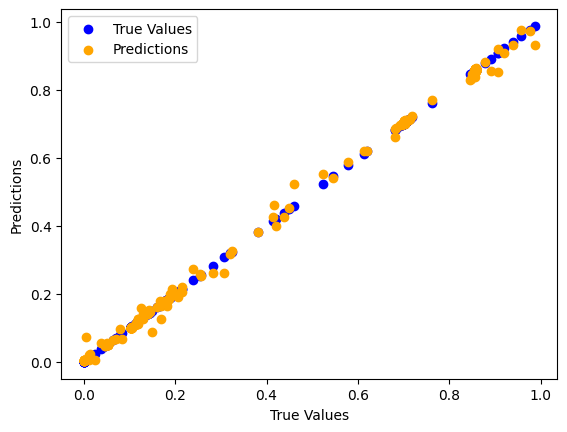

In [32]:
import matplotlib.pyplot as plt

# Load the saved model
lstm_model = keras.models.load_model('lstm_model.h5')

# Get the predicted values for the first 50 points in the test dataset
n = 100
x_sample = x_test[:n]
y_true = y_test[:n]
y_pred = lstm_model.predict(x_sample)

# Create a scatter plot comparing the predicted values to the true values
plt.scatter(y_true, y_true, c='blue', label='True Values')
plt.scatter(y_true, y_pred, c='orange', label='Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


In [68]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from prepare_data import prepare_data

x_train, y_train, x_test, y_test, scalers, num_classes = prepare_data('transformer')


# from keras nlp transformer encoder definition, based upon 'Attention is all you need' architecture:
# https://github.com/keras-team/keras-nlp/blob/v0.3.1/keras_nlp/layers/transformer_encoder.py#L24
def transformer_encoder(inputs, num_heads, dropout=0):
    # Attention and Normalization
    feature_size = inputs.shape[-1]
    attention_head_size = int(feature_size // num_heads)
    x = layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=attention_head_size,
        value_dim=attention_head_size,
        dropout=dropout,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
    )(inputs, inputs, inputs)

    x = layers.LayerNormalization(
        epsilon=1e-6,
    )(inputs + x)

    x = layers.Dense(
        4,
        activation="relu",
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
    )(x)
    x = layers.Dropout(rate=dropout)(x)
    x = layers.Dense(
        feature_size,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
    )(x)

    x = layers.LayerNormalization(
        epsilon=1e-6,
    )(inputs + x)

    x = keras.layers.Dropout(rate=dropout)(x)
    res = x + inputs

    return res


def build_model(
        input_shape,
        num_heads,
        num_transformer_blocks,
        dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        res = transformer_encoder(x, num_heads, dropout)
        # Added convolutions layers as per Keras example code here:
        # https://github.com/keras-team/keras-io/blob/master/examples/timeseries/timeseries_classification_transformer.py
        x = layers.Conv1D(filters=4, kernel_size=1, activation="relu")(res)
        x = layers.Dropout(dropout)(x)
        x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
        x = layers.LayerNormalization(epsilon=1e-6,)(x)
        x = x + res

    # Global pooling to reduce dimensions down to that of the number of classes
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)


input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    num_heads=4,
    num_transformer_blocks=4,
    dropout=0.25
)

# Using legacy Adam optimizer because of macOS compatibility issues
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.legacy.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

# Reduce learning rate on plateau allows for better approximation of local minimum
callbacks = [keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
             keras.callbacks.ModelCheckpoint('transformer_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True,
                                             mode='min',
                                             verbose=1),
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                               patience=8, min_lr=1e-6)
             ]


def run_Transforer_model():
    history = model.fit(
        x_train,
        y_train,
        validation_split=0.2,
        epochs=10,
        batch_size=64,
        callbacks=callbacks,
    )

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 5, 100)]     0           []                               
                                                                                                  
 multi_head_attention_16 (Multi  (None, 5, 100)      40400       ['input_5[0][0]',                
 HeadAttention)                                                   'input_5[0][0]',                
                                                                  'input_5[0][0]']                
                                                                                                  
 tf.__operators__.add_64 (TFOpL  (None, 5, 100)      0           ['input_5[0][0]',                
 ambda)                                                           'multi_head_attention_16[0

 multi_head_attention_18 (Multi  (None, 5, 100)      40400       ['tf.__operators__.add_71[0][0]',
 HeadAttention)                                                   'tf.__operators__.add_71[0][0]',
                                                                  'tf.__operators__.add_71[0][0]']
                                                                                                  
 tf.__operators__.add_72 (TFOpL  (None, 5, 100)      0           ['tf.__operators__.add_71[0][0]',
 ambda)                                                           'multi_head_attention_18[0][0]']
                                                                                                  
 layer_normalization_54 (LayerN  (None, 5, 100)      200         ['tf.__operators__.add_72[0][0]']
 ormalization)                                                                                    
                                                                                                  
 dense_54 

                                                                                                  
 dropout_140 (Dropout)          (None, 128)          0           ['dense_58[0][0]']               
                                                                                                  
 dense_59 (Dense)               (None, 4)            516         ['dropout_140[0][0]']            
                                                                                                  
Total params: 172,516
Trainable params: 172,516
Non-trainable params: 0
__________________________________________________________________________________________________


In [69]:
run_Transforer_model()

Epoch 1/10
377/378 [============================>.] - ETA: 0s - loss: 1.3535 - sparse_categorical_accuracy: 0.3370
Epoch 1: val_loss improved from inf to 1.31428, saving model to transformer_model.h5
378/378 [==============================] - 14s 26ms/step - loss: 1.3536 - sparse_categorical_accuracy: 0.3367 - val_loss: 1.3143 - val_sparse_categorical_accuracy: 0.3914 - lr: 1.0000e-04
Epoch 2/10
378/378 [==============================] - ETA: 0s - loss: 1.3140 - sparse_categorical_accuracy: 0.3885
Epoch 2: val_loss improved from 1.31428 to 1.29270, saving model to transformer_model.h5
378/378 [==============================] - 9s 25ms/step - loss: 1.3140 - sparse_categorical_accuracy: 0.3885 - val_loss: 1.2927 - val_sparse_categorical_accuracy: 0.3977 - lr: 1.0000e-04
Epoch 3/10
378/378 [==============================] - ETA: 0s - loss: 1.2999 - sparse_categorical_accuracy: 0.4038
Epoch 3: val_loss improved from 1.29270 to 1.27791, saving model to transformer_model.h5
378/378 [========

In [78]:
x_train, y_train, x_test, y_test, scalers, num_classes = prepare_data('evaluate')
# lstm_model = build_model((4, 99), 4)
# transformer_model = transformer_build_model((5, 100),
#                                             num_heads=4,
#                                             num_transformer_blocks=4,
#                                             dropout=0.25)
lstm_model = keras.models.load_model('lstm_model.h5')
lstm_model.load_weights('lstm_model.h5')
transformer_model = keras.models.load_model('transformer_model.h5')
transformer_model.load_weights('transformer_model.h5')

In [79]:

x_test_lstm = x_test[:, :4, :99]
x_test_transformer = x_test[:, :, :]

y_pred_location = lstm_model.predict(x_test_lstm)
y_pred_transportation_mode = transformer_model.predict(x_test_transformer)

# replace last location data in each of the test sequences with the lstm prediction
x_test[:, :4, 99] = y_pred_location

for i in range(x_test.shape[1]):
    x_test[:, i, :] = scalers[i].inverse_transform(x_test[:, i, :])

label_dict = {'walk': 0, 'motor vehicle': 1, 'bike': 2, 'train': 3}
inv_map = {v: k for k, v in label_dict.items()}
y_pred_transformer = np.argmax(y_pred_transportation_mode, axis=1)
y_pred_transformer = np.array([inv_map.get(item, item) for item in y_pred_transformer])

# select random sequence to display
rand_index = np.random.randint(0, len(x_test))
df_tableau = pd.DataFrame(x_test[rand_index, :, :].transpose(), columns=['x', 'y', 'z', 'timedelta', 'distance'])
df_tableau['mode_prediction'] = y_pred_transformer[rand_index]

R = 6371
df_tableau['Latitude'] = np.degrees(np.arcsin(df_tableau['z']/R))
df_tableau['Longitude'] = np.degrees(np.arctan2(df_tableau['y'], df_tableau['x']))

df_tableau.drop(['x', 'y', 'z'], axis=1, inplace=True)
df_tableau['timestamp'] = df_tableau.apply(lambda x: datetime.strptime('2007-08-04 03:30:32', '%Y-%m-%d %H:%M:%S') + timedelta(seconds=x['timedelta']), axis=1)

df_tableau.to_csv('tableau_data.csv')

237/237 [==============================] - 2s 8ms/step


NameError: name 'datetime' is not defined